In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ConfusionMatrix
import os
import joblib
from dataprep.eda import *
import ydata_profiling
from pycaret.classification import *

In [11]:
df = pd.read_csv("/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv")
df 

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [12]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [13]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<Axes: title={'center': 'booking_status'}, xlabel='booking_status', ylabel='count'>

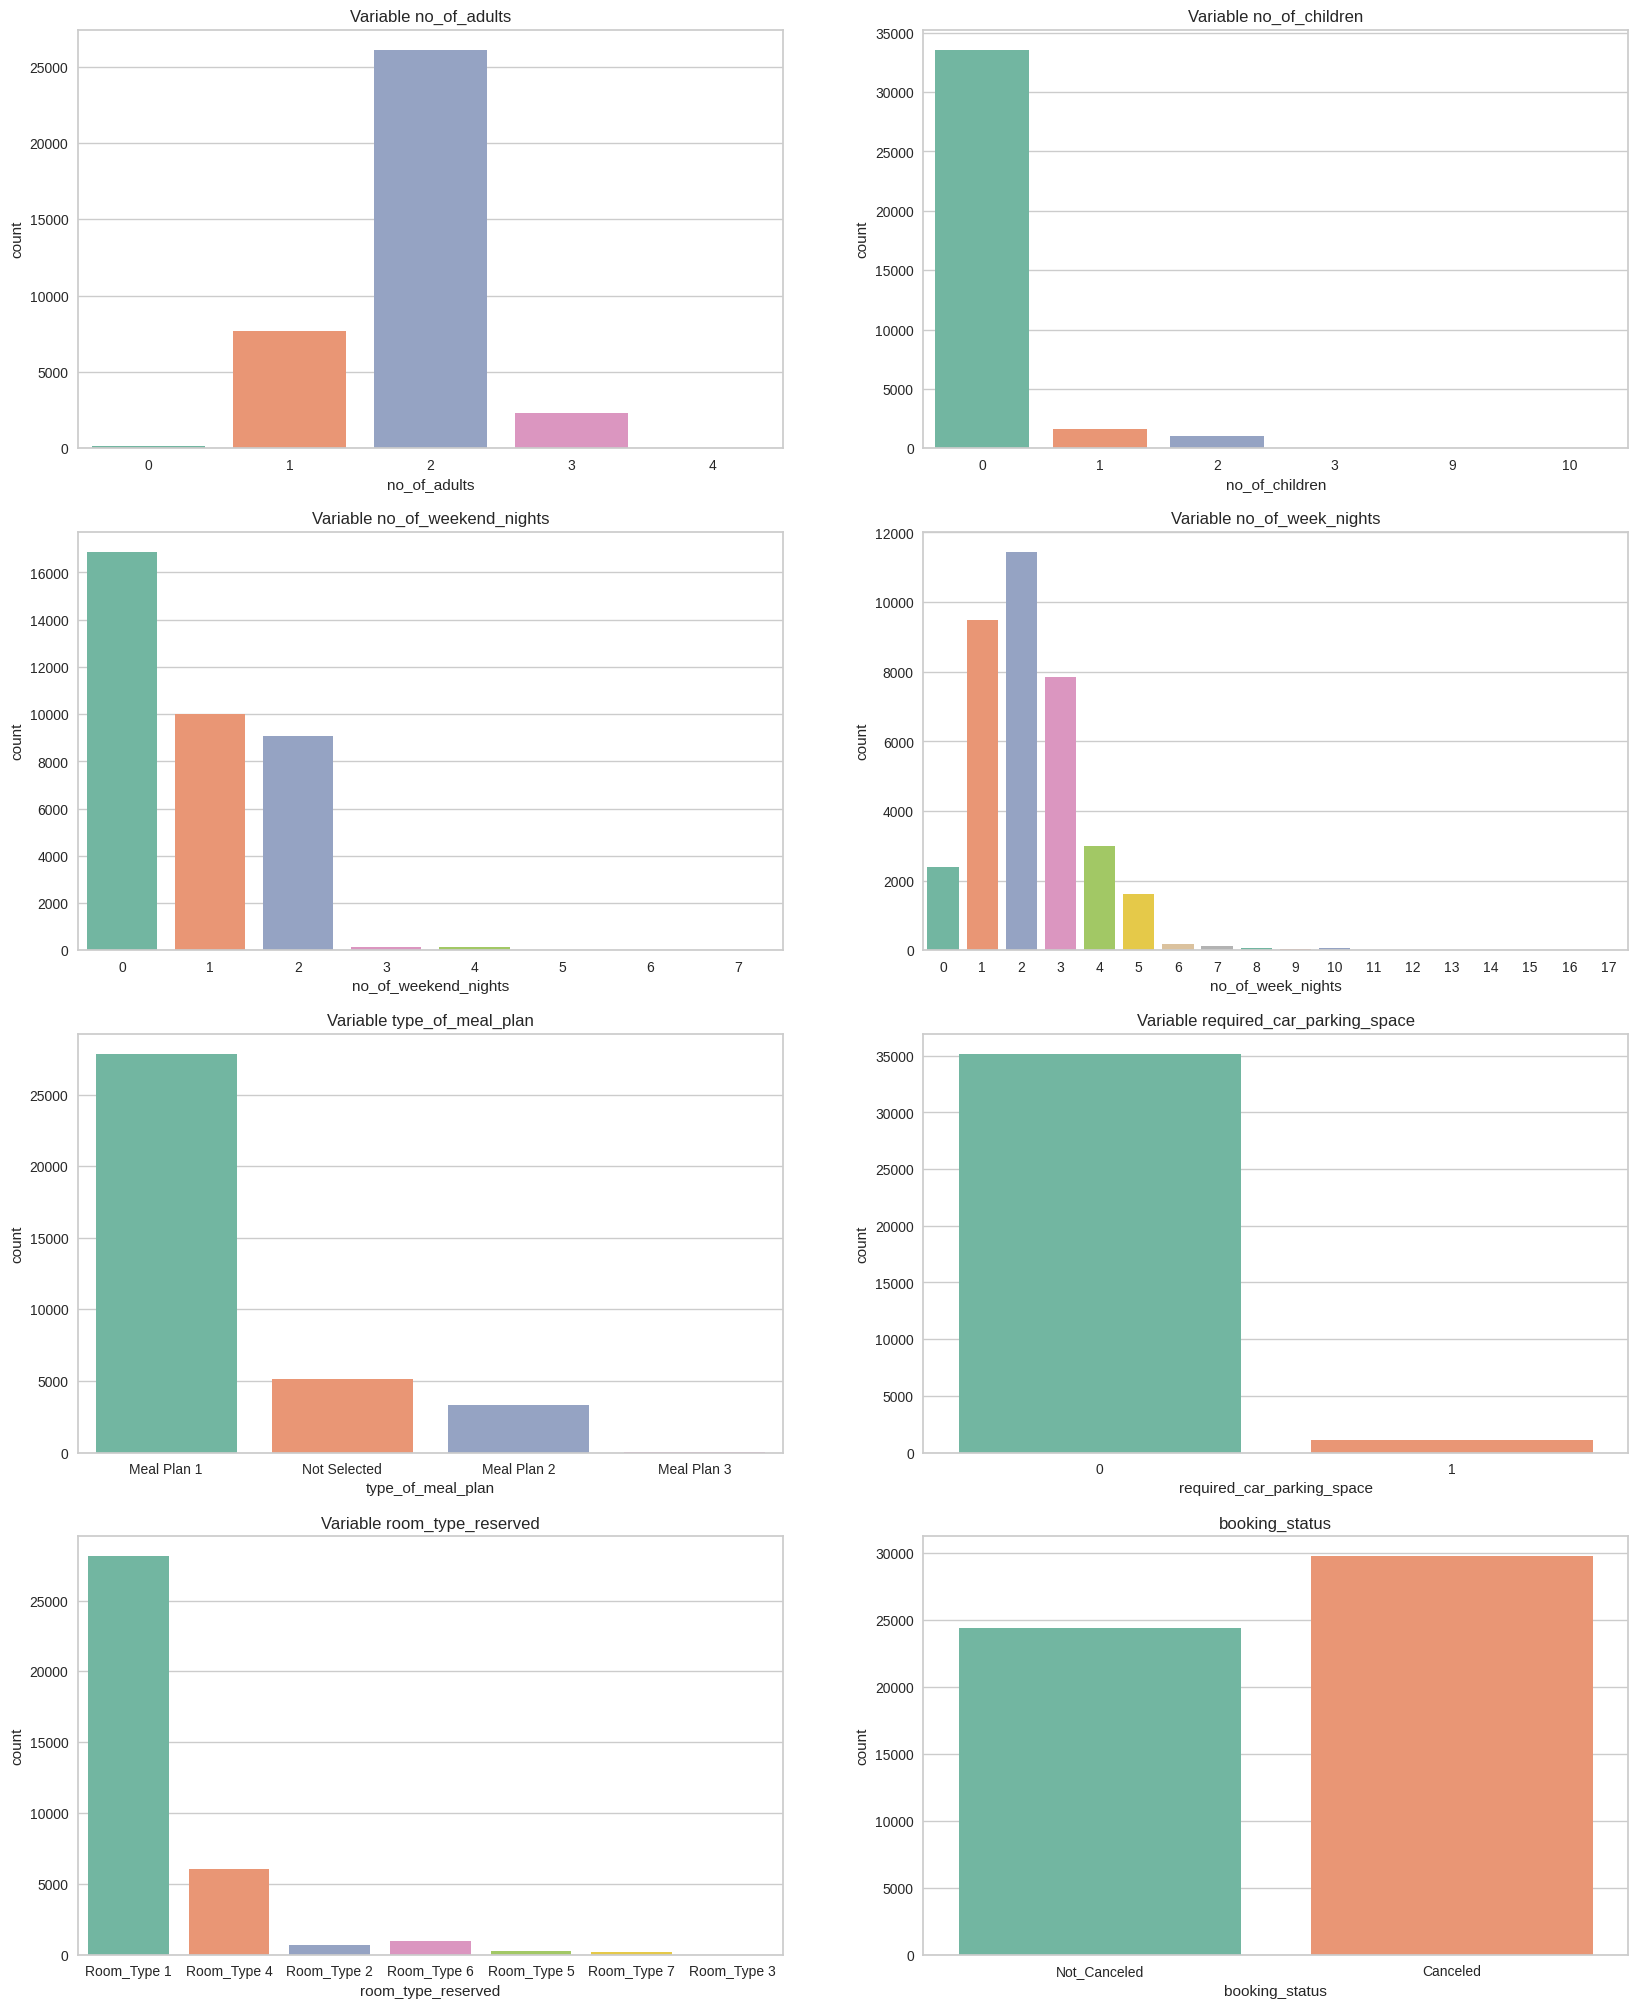

In [14]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Variable no_of_adults')
sns.countplot(x = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(4,2,2)
plt.gca().set_title('Variable no_of_children')
sns.countplot(x = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(4,2,3)
plt.gca().set_title('Variable no_of_weekend_nights')
sns.countplot(x = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(4,2,4)
plt.gca().set_title('Variable no_of_week_nights')
sns.countplot(x = 'no_of_week_nights', palette = 'Set2', data = df)

plt.subplot(4,2,5)
plt.gca().set_title('Variable type_of_meal_plan')
sns.countplot(x = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(4,2,6)
plt.gca().set_title('Variable required_car_parking_space')
sns.countplot(x = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(4,2,7)
plt.gca().set_title('Variable room_type_reserved')
sns.countplot(x = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(4,2,8)
plt.gca().set_title('Variable arrival_year')
sns.countplot(x = 'arrival_year', palette = 'Set2', data = df)

plt.subplot(4,2,8)
plt.gca().set_title('booking_status')
sns.countplot(x = 'booking_status', palette = 'Set2', data = df)

<Axes: xlabel='booking_status', ylabel='count'>

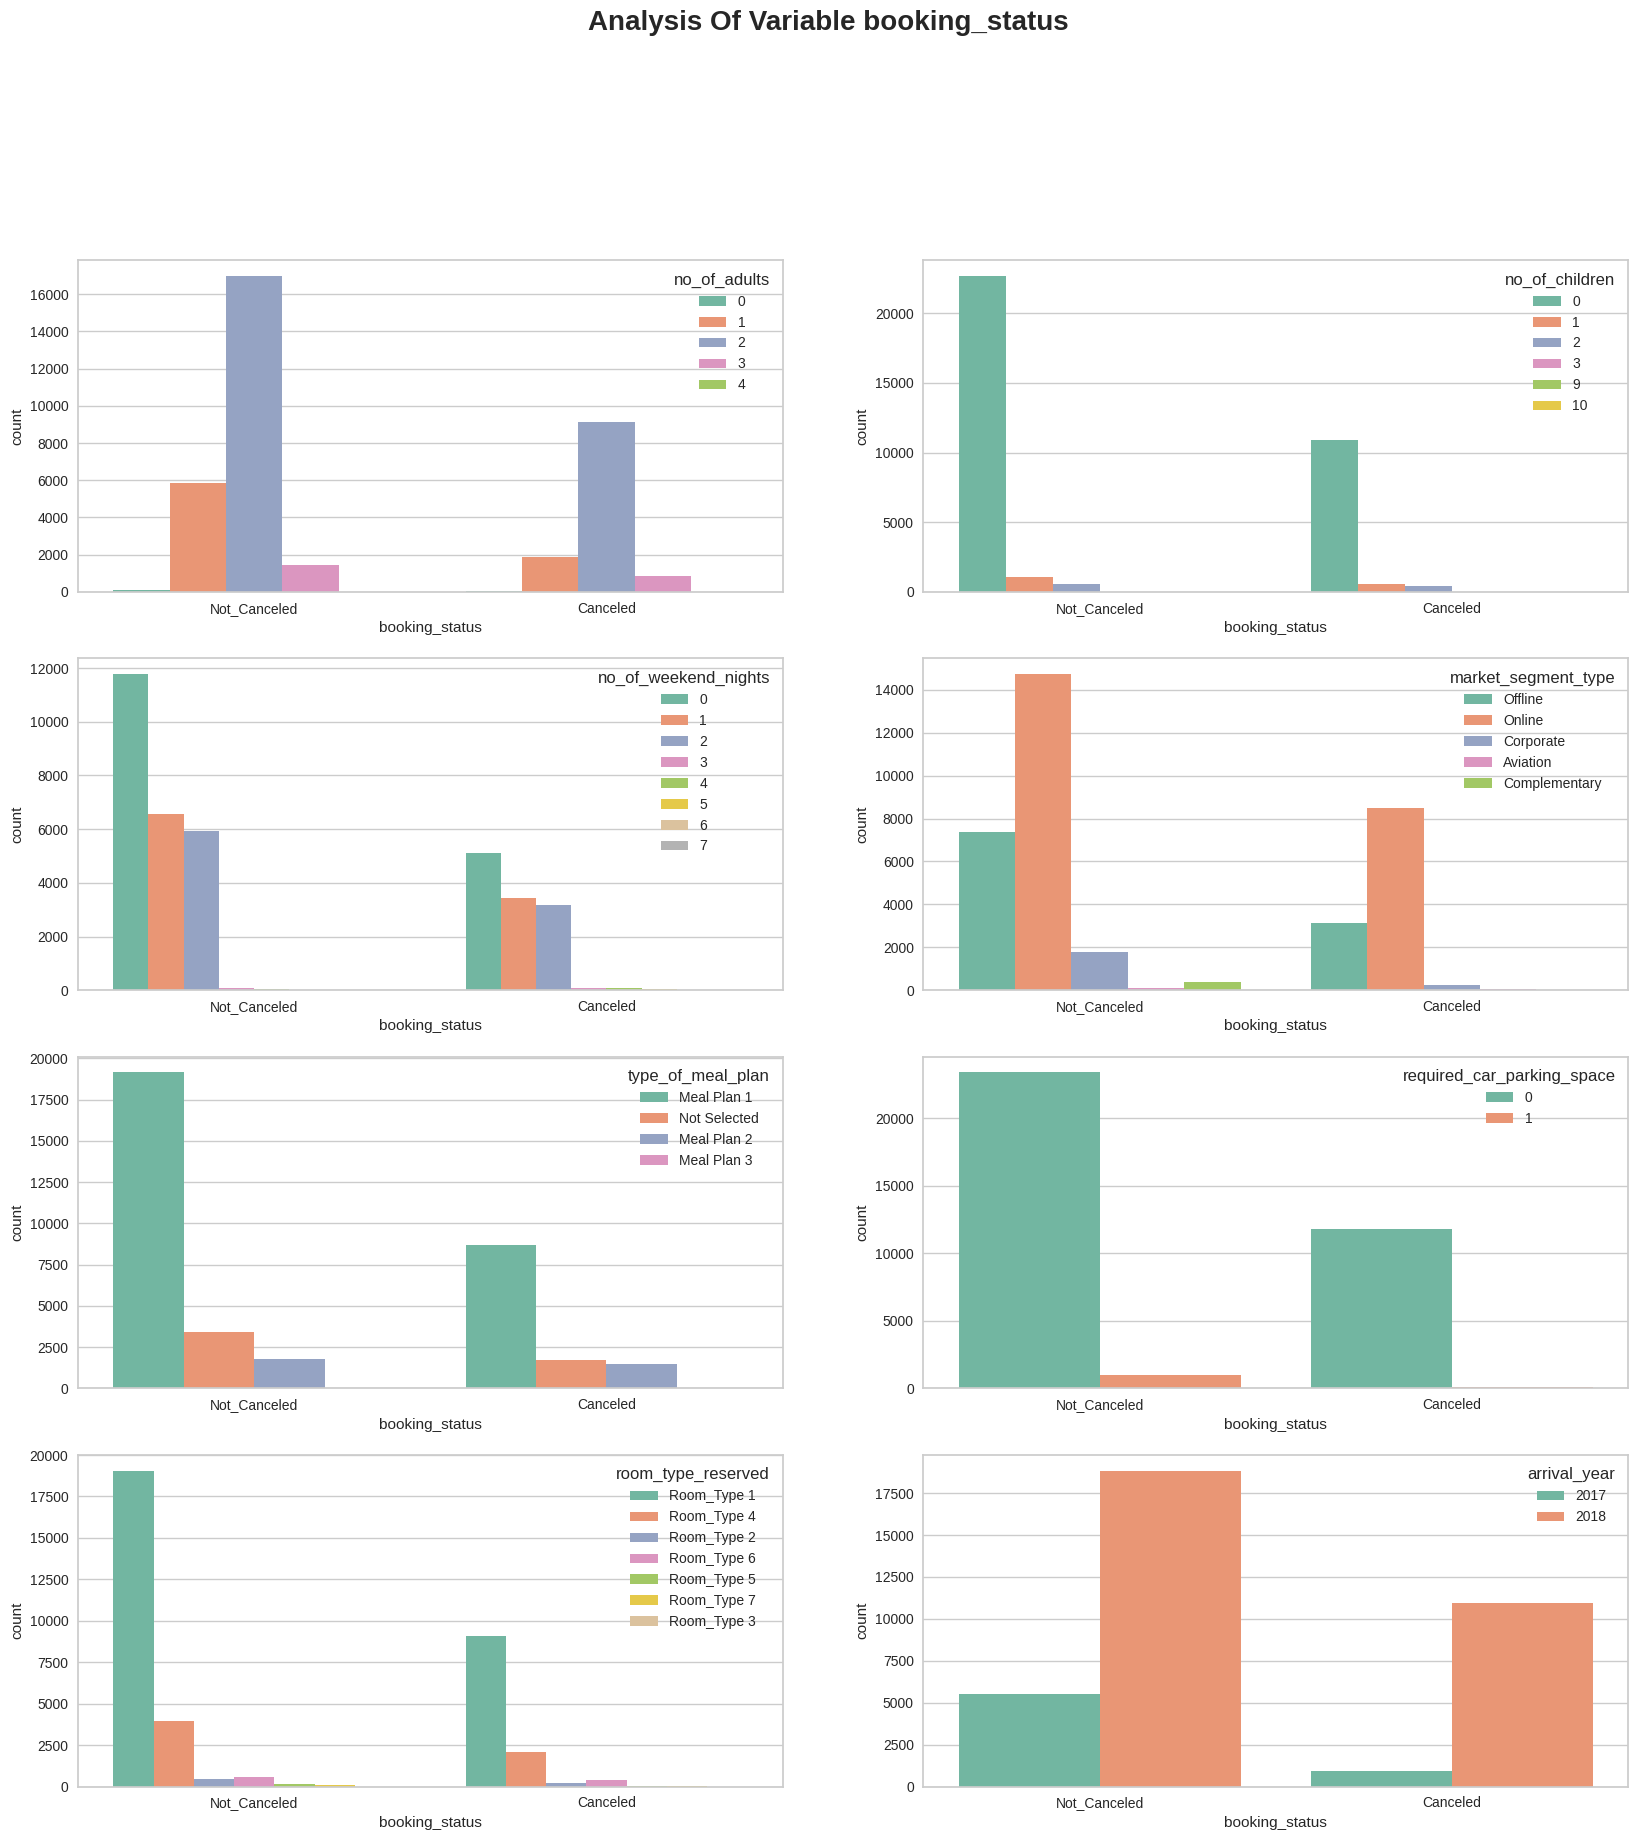

In [15]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'booking_status', hue = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'booking_status', hue = 'market_segment_type', palette = 'Set2', data = df)

plt.subplot(5,2,5)
sns.countplot(x = 'booking_status', hue = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(5,2,6)
sns.countplot(x = 'booking_status', hue = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(5,2,7)
sns.countplot(x = 'booking_status', hue = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(5,2,8)
sns.countplot(x = 'booking_status', hue = 'arrival_year', palette = 'Set2', data = df)

In [16]:
df = df.drop('Booking_ID', axis = 1)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [17]:
label_encoder_type_of_meal_plan = LabelEncoder()
label_encoder_room_type_reserved = LabelEncoder()
label_encoder_market_segment_type = LabelEncoder()
label_encoder_booking_status = LabelEncoder()

df['type_of_meal_plan'] = label_encoder_type_of_meal_plan.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved'] = label_encoder_room_type_reserved.fit_transform(df['room_type_reserved'])
df['market_segment_type'] = label_encoder_market_segment_type.fit_transform(df['market_segment_type'])
df['booking_status'] = label_encoder_booking_status.fit_transform(df['booking_status'])

df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


In [18]:
le_name_mapping = dict(zip(label_encoder_booking_status.classes_, label_encoder_booking_status.transform(label_encoder_booking_status.classes_)))
print(le_name_mapping)

{'Canceled': 0, 'Not_Canceled': 1}


In [19]:
X = df.drop('booking_status', axis = 1)
X = X.values
y = df['booking_status']

In [20]:
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [21]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
print("X_train.shape: ", X_train.shape[0])
print("y_train.shape: ", y_train.shape[0])
print("X_test.shape: ", X_test.shape[0])
print("y_test.shape: ", y_test.shape[0])

X_train.shape:  29020
y_train.shape:  29020
X_test.shape:  7255
y_test.shape:  7255


## Model 1: KNN 

In [23]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
predictions = knn_classifier.predict(X_test)

In [24]:
classification_knn = (classification_report(y_test, predictions))
print(classification_knn)

              precision    recall  f1-score   support

           0       0.76      0.63      0.69      2416
           1       0.83      0.90      0.86      4839

    accuracy                           0.81      7255
   macro avg       0.79      0.77      0.78      7255
weighted avg       0.81      0.81      0.81      7255



0.8097863542384562

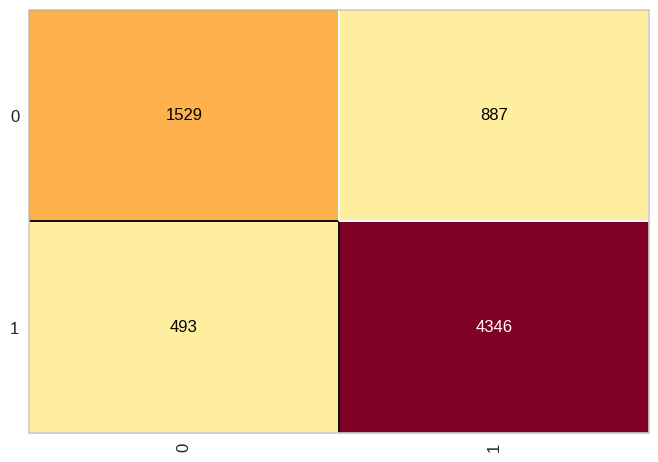

In [25]:
cm = ConfusionMatrix(knn_classifier)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

# Model 2: Logistic Regression

In [26]:
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)
predictions = logreg_classifier.predict(X_test)

0.7921433494141971

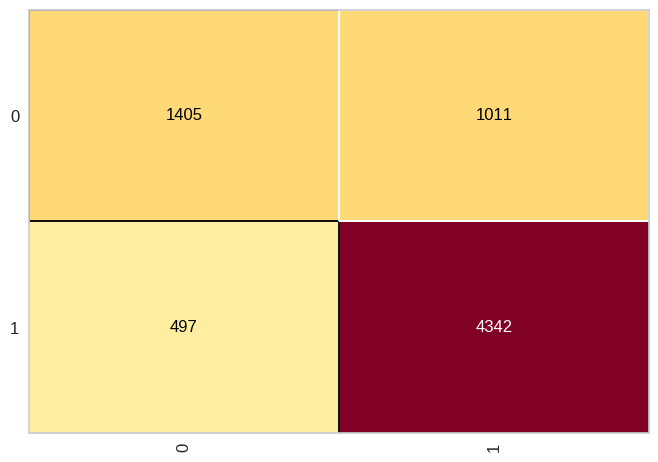

In [27]:
cm = ConfusionMatrix(logreg_classifier)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [28]:
classification_logistic_regression = (classification_report(y_test, predictions))
print(classification_logistic_regression)

              precision    recall  f1-score   support

           0       0.74      0.58      0.65      2416
           1       0.81      0.90      0.85      4839

    accuracy                           0.79      7255
   macro avg       0.77      0.74      0.75      7255
weighted avg       0.79      0.79      0.79      7255



# Model 3: DecisionTreeClassifier

In [29]:
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

decision_tree = DecisionTreeClassifier()
gridDecisionTree = GridSearchCV(estimator = decision_tree, param_grid = values_grid, cv = 5)
gridDecisionTree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

In [30]:
print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  5
Max Nvl:  11
Algorithm:  gini
Score:  0.8747070985527223


In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [32]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.40%
_______________________________________________
CLASSIFICATION REPORT:
                     0             1  accuracy     macro avg  weighted avg
precision     0.990501      0.995702  0.994004      0.993102      0.994005
recall        0.991129      0.995397  0.994004      0.993263      0.994004
f1-score      0.990815      0.995549  0.994004      0.993182      0.994005
support    9469.000000  19551.000000  0.994004  29020.000000  29020.000000
_______________________________________________
Confusion Matrix: 
 [[ 9385    84]
 [   90 19461]]

Test Result:
Accuracy Score: 86.96%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.797330     0.906962  0.869607     0.852146      0.870453
recall        0.815811     0.896466  0.869607     0.856139      0.869607
f1-score      0.806465     0.901684  0.869607     0.854074      0.869975
support    2416.00

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=0)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits

Best paramters: {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'})

Train Result:


Accuracy Score: 89.82%

_______________________________________________

CLASSIFICATION REPORT:

                     0             1  accuracy     macro avg  weighted avg

precision     0.858098      0.916637  0.898243      0.887368      0.897506

recall        0.825074      0.933763  0.898243      0.879419      0.898243

f1-score      0.841262      0.925121  0.898243      0.883192      0.897715

support    9484.000000  19536.000000  0.898243  29020.000000  29020.000000

_______________________________________________

Confusion Matrix: 

 [[ 7825  1659]

 [ 1294 18242]]



Test Result:


Accuracy Score: 87.79%

_______________________________________________

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg

precision     0.832675

In [33]:
decision_tree_classifier = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, max_depth= 11, random_state=0)
decision_tree_classifier.fit(X_train, y_train)
predictions = decision_tree_classifier.predict(X_test)

0.8744314266023432

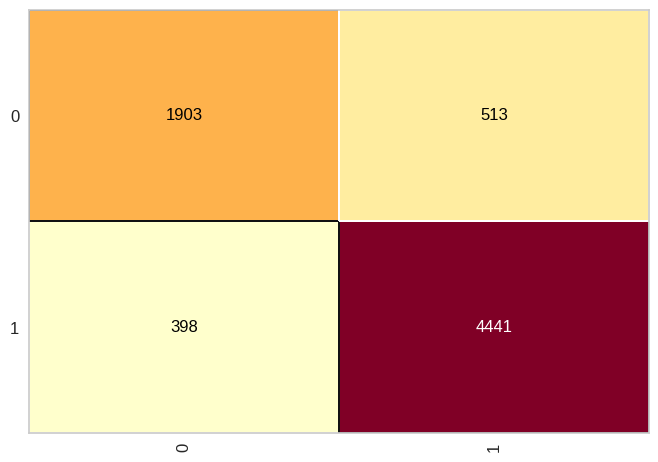

In [34]:
cm = ConfusionMatrix(decision_tree_classifier)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [35]:
classification_decision_tree = (classification_report(y_test, predictions))
print(classification_decision_tree)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2416
           1       0.90      0.92      0.91      4839

    accuracy                           0.87      7255
   macro avg       0.86      0.85      0.86      7255
weighted avg       0.87      0.87      0.87      7255



In [36]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.40%
_______________________________________________
CLASSIFICATION REPORT:
                     0             1  accuracy     macro avg  weighted avg
precision     0.993942      0.994034  0.994004      0.993988      0.994004
recall        0.987644      0.997085  0.994004      0.992364      0.994004
f1-score      0.990783      0.995557  0.994004      0.993170      0.993999
support    9469.000000  19551.000000  0.994004  29020.000000  29020.000000
_______________________________________________
Confusion Matrix: 
 [[ 9352   117]
 [   57 19494]]

Test Result:
Accuracy Score: 90.54%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.883762     0.915217  0.905445     0.899490      0.904742
recall        0.824503     0.945857  0.905445     0.885180      0.905445
f1-score      0.853105     0.930285  0.905445     0.891695      0.904583
support    2416.00

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=0)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits

Best paramters: {'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': False})

Train Result:


Accuracy Score: 97.75%

_______________________________________________

CLASSIFICATION REPORT:

                     0             1  accuracy     macro avg  weighted avg

precision     0.976787      0.977882  0.977533      0.977335      0.977524

recall        0.953922      0.988995  0.977533      0.971459      0.977533

f1-score      0.965219      0.983407  0.977533      0.974313      0.977463

support    9484.000000  19536.000000  0.977533  29020.000000  29020.000000

_______________________________________________

Confusion Matrix: 

 [[ 9047   437]

 [  215 19321]]



Test Result:


Accuracy Score: 90.57%

_______________________________________________

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg

pre

In [37]:
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier(random_state= 42)
tr.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=42)

In [38]:
tr.score(X_train, y_train)*100

99.40041350792556

In [40]:
y_pred = tr.predict(X_test)
accuracy_score(y_pred, y_test)*100

87.09855272226051

In [41]:
tr = SVC(C = 1.0, kernel = 'linear')
tr.fit(X_train, y_train)

SVC(kernel='linear')

In [42]:
y_pred = tr.predict(X_test)
accuracy_score(y_pred, y_test)*100

80.0

In [43]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_pred = lr.predict(X_test)
accuracy_score(y_pred, y_test)*100

79.21433494141971

In [45]:
ac = neighbors.KNeighborsClassifier(n_neighbors=10)
ac.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=10)

In [46]:
y_pred = ac.predict(X_test)
accuracy_score(y_pred, y_test)*100

80.06891798759477

In [47]:
rf = RandomForestClassifier(n_estimators=2)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2)

In [48]:
y_pred = rf.predict(X_test)
accuracy_score(y_pred, y_test)*100

84.5210199862164

In [49]:
score = cross_val_score(tr, X, y, cv = 10)
score.mean()*100

79.79591763841506

# Model 3 : Grid Search for KNN

In [50]:
columns = df.drop('booking_status', axis = 1).columns
feature_imp = pd.Series(decision_tree_classifier.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

lead_time                               0.399245
avg_price_per_room                      0.163806
market_segment_type                     0.147889
no_of_special_requests                  0.106050
arrival_month                           0.056561
no_of_weekend_nights                    0.027524
arrival_date                            0.022376
no_of_adults                            0.021907
no_of_week_nights                       0.018385
arrival_year                            0.017109
required_car_parking_space              0.008937
type_of_meal_plan                       0.007319
room_type_reserved                      0.002002
no_of_children                          0.000686
repeated_guest                          0.000203
no_of_previous_cancellations            0.000000
no_of_previous_bookings_not_canceled    0.000000
dtype: float64

In [51]:
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (3,12)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

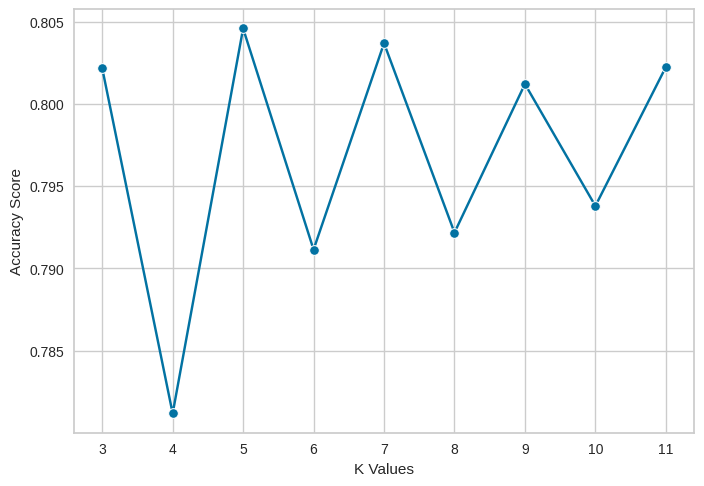

In [52]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

# Model 4 AutoML

In [54]:
df2 = pd.read_csv('/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv', sep = ',')
df2.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [55]:
clf1 = setup(data = df2, 
             target = 'booking_status',
             numeric_imputation = 'mean',
             categorical_features = ['type_of_meal_plan','room_type_reserved', 'market_segment_type'], 
             ignore_features = ['Booking_ID'])

,Description,Value
0,Session id,7673
1,Target,booking_status
2,Target type,Binary
3,Target mapping,"Canceled: 0, Not_Canceled: 1"
4,Original data shape,"(36275, 19)"
5,Transformed data shape,"(36275, 31)"
6,Transformed train set shape,"(25392, 31)"
7,Transformed test set shape,"(10883, 31)"
8,Ignore features,1
9,Numeric features,14


In [56]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8985,0.9514,0.9421,0.9101,0.9258,0.7652,0.7665,1.7710
xgboost,Extreme Gradient Boosting,0.8921,0.9519,0.9359,0.9066,0.9210,0.7509,0.7519,2.2160
catboost,CatBoost Classifier,0.8899,0.9509,0.9383,0.9019,0.9197,0.7447,0.7462,11.5280
et,Extra Trees Classifier,0.8877,0.9431,0.9312,0.9047,0.9177,0.7412,0.7420,1.9460
lightgbm,Light Gradient Boosting Machine,0.8861,0.9490,0.9346,0.8999,0.9169,0.7362,0.7377,1.3940
dt,Decision Tree Classifier,0.8626,0.8501,0.8918,0.9027,0.8972,0.6900,0.6902,0.3550
gbc,Gradient Boosting Classifier,0.8537,0.9148,0.9277,0.8646,0.8950,0.6547,0.6593,1.6930
ada,Ada Boost Classifier,0.8181,0.8843,0.8860,0.8499,0.8675,0.5776,0.5790,0.7670
knn,K Neighbors Classifier,0.8045,0.8442,0.8918,0.8301,0.8598,0.5381,0.5419,0.6670
lr,Logistic Regression,0.7995,0.8611,0.8882,0.8266,0.8563,0.5265,0.5303,1.9080


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=7673, verbose=0, warm_start=False)

In [57]:
rf1  = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9035,0.9565,0.9450,0.9144,0.9295,0.7771,0.7782
1,0.8850,0.9407,0.9292,0.9027,0.9158,0.7350,0.7357
2,0.9039,0.9547,0.9508,0.9103,0.9301,0.7765,0.7784
3,0.8964,0.9487,0.9432,0.9065,0.9245,0.7598,0.7613
4,0.8992,0.9533,0.9397,0.9129,0.9261,0.7676,0.7684
5,0.9000,0.9518,0.9455,0.9093,0.9271,0.7681,0.7696
6,0.9035,0.9561,0.9508,0.9098,0.9298,0.7757,0.7776
7,0.8980,0.9516,0.9338,0.9161,0.9249,0.7661,0.7664
8,0.9023,0.9507,0.9502,0.9087,0.9290,0.7729,0.7748


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [58]:
tuned_rf = tune_model(rf1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8642,0.9349,0.8858,0.9098,0.8977,0.6959,0.6964
1,0.8559,0.9253,0.8911,0.8942,0.8927,0.6735,0.6735
2,0.8681,0.9347,0.9052,0.8994,0.9022,0.6993,0.6994
3,0.8685,0.9331,0.8987,0.9050,0.9018,0.7025,0.7026
4,0.8606,0.9303,0.8828,0.9073,0.8949,0.6880,0.6886
5,0.8755,0.9385,0.9039,0.9103,0.9071,0.7186,0.7186
6,0.8610,0.9334,0.8834,0.9073,0.8952,0.6888,0.6893
7,0.8602,0.9361,0.8758,0.9127,0.8939,0.6893,0.6905
8,0.8653,0.9317,0.8887,0.9089,0.8987,0.6978,0.6982


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


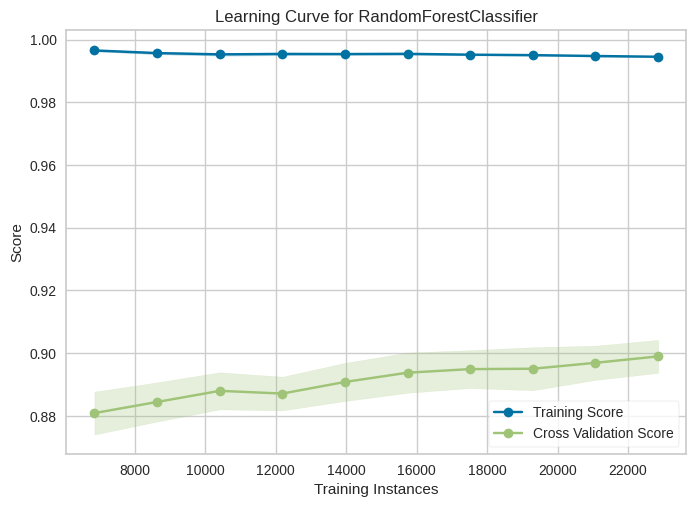

In [59]:
plot_model(estimator = tuned_rf, plot = 'learning')

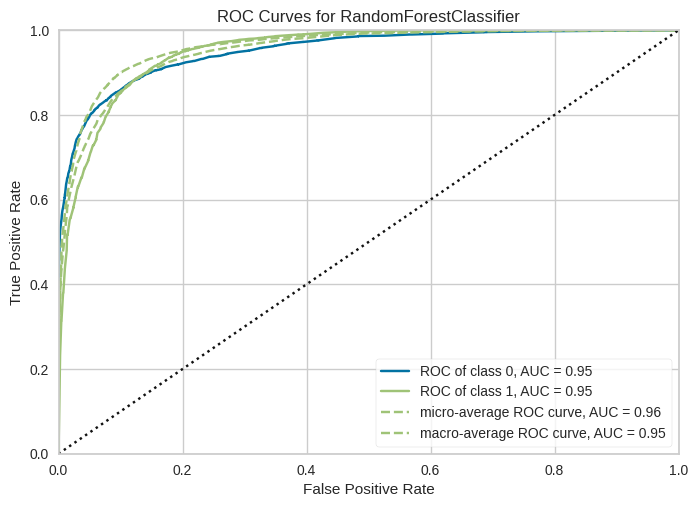

In [60]:
plot_model(estimator = tuned_rf, plot = 'auc')

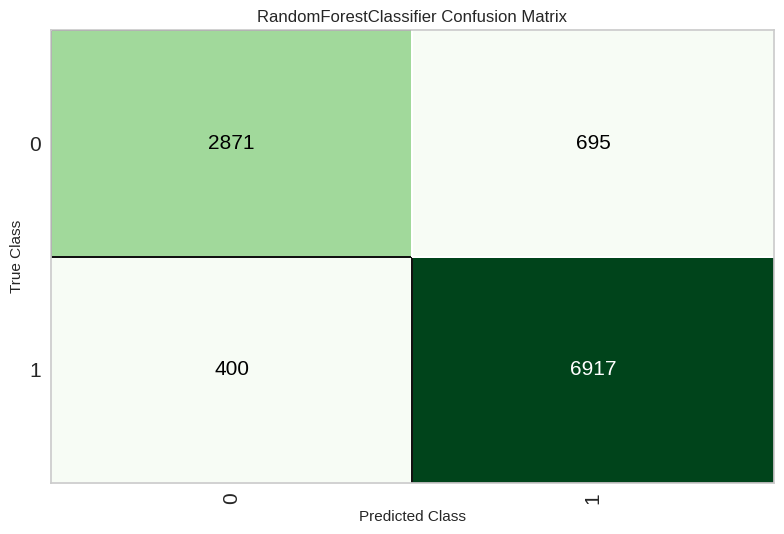

In [61]:
plot_model(estimator = tuned_rf, plot = 'confusion_matrix')

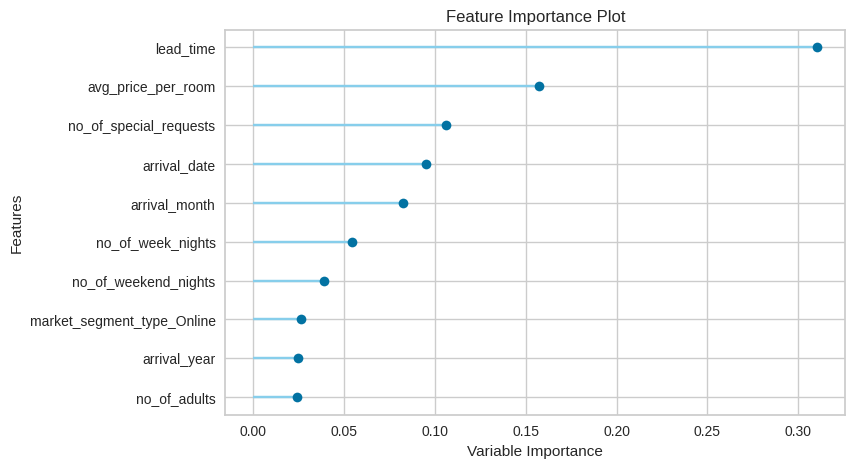

In [62]:
plot_model(estimator = tuned_rf, plot = 'feature')

## Explainability

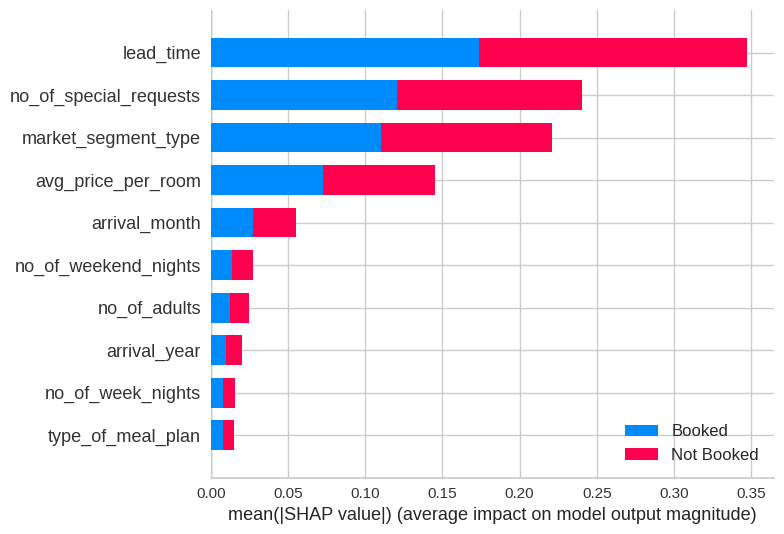

In [63]:
import shap
columns = df.drop('booking_status', axis = 1).columns
explainer = shap.TreeExplainer(decision_tree_classifier)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test,plot_type='bar',max_display=10,class_names=["Booked", "Not Booked"], feature_names = columns.tolist())

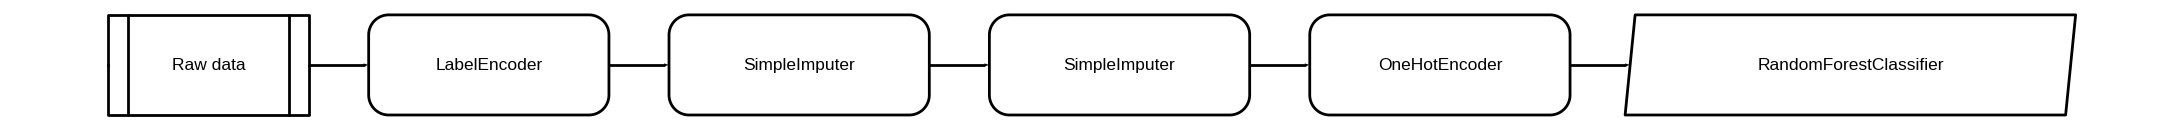

In [64]:
evaluate_model(tuned_rf)

In [ ]:
# # Get the model explainer object
#explainer = shap.KernelExplainer(knn_classifier.predict_proba, X_train)

# # Get shap values for the test data observation whose index is 0, i.e. first observation in the test set
#shap_values = explainer.shap_values(X_test)

# # Generate a force plot for this first observation using the derived shap values
#shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

In [67]:
import gradio as gra
def user_greeting(name):
     return "Hi! " + name + " Welcome to Project X!😎"
    
## define gradio interface and other parameters
app =  gra.Interface(fn = user_greeting, inputs="text", outputs="text")
app.launch()

Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://cc1ffc267ff6d5a0d4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
